## OSR test for case 1a

>   ### model performance is worsening fitting an in-Sample model with exogenous "outdoor temperature"

apparently the outdoor temperature does not fit the MW usage. Potentially the outdoor temperature is not meditaing the MW controls. More analysis is necessary. It is as if the MW consumption controls are not directly affected by the external tempreature

>>#### Test RMSE: 0.136
>>#### Test MAPE: inf
>>#### Test SMAPE: 6.462
>>#### Correlation: 0.936
>>#### R-squared: 0.875   

>   #### target feature:            MW (thermic) 
>   #### exogenous feature:         OUT_TEMP (outdoor temperature) 
>   ### statistical esimator:       SARIMAX - Seasonal Auto-Regressive Integrated Moving Average
   


> RENergetic Project: fitting a forcasting estimator to predict MW over time and use of outdoor temperature as exo feature

>This model is based on model proptotyping run in IBM Modeler 18.2 software at 07/05/21

> Dataframe from: XXX building complex 
>   ### time window covered: 15-Aug-2020 -> 09 Nov 2020

>Other buildings in OXXX and dataframes available - contact DR D. Baranzini)

>> Coding by Dr Daniele Baranzini



In [92]:
# method to check working directory
import os
CURR_DIR = os.getcwd()
print(CURR_DIR)

C:\Users\DANIELE\Documents\GitHub\RENergetic-AI-solve\code


In [93]:
%matplotlib inline

In [94]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from datetime import datetime                              # maybe necessary for future actions on dates and indexing
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX     # toy-model for SARIMAX estimator
from random import random
import openpyxl

In [95]:
# read data and encode timestamp as index
df_base = pd.read_excel('Summer_Period_Dibit2_V04_REPLICA.xlsx')
df_base.index = df_base['timestamp']
ts1 = df_base[['OUT_TEMP', 'MW']]                                   #the timestamp column is removed as it is doubled with index 
endog = ts1['MW']
exog = ts1['OUT_TEMP']
ts1

,OUT_TEMP,MW
timestamp,,
2020-08-15 00:00:00,24.0,0.94
2020-08-15 01:00:00,22.9,0.94
2020-08-15 02:00:00,21.5,1.07
2020-08-15 03:00:00,21.9,0.91
2020-08-15 04:00:00,21.5,0.99
...,...,...
2020-11-09 19:00:00,11.6,1.76
2020-11-09 20:00:00,10.6,1.76
2020-11-09 21:00:00,9.8,1.91


### In-Sample fitting 

In [96]:
# fit the complete model
model = SARIMAX(endog, exog, order=(0,1,0), seasonal_order=(1,0,1,24))
fit_res = model.fit(disp=False, maxiter=250)
print(fit_res.summary())


C:\Users\DANIELE\Anaconda3\envs\RENergectic_Forecasting_Models_\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\DANIELE\Anaconda3\envs\RENergectic_Forecasting_Models_\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                                   MW   No. Observations:                 2088
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 24)   Log Likelihood                1237.001
Date:                              Fri, 07 May 2021   AIC                          -2466.002
Time:                                      18:18:53   BIC                          -2443.428
Sample:                                  08-15-2020   HQIC                         -2457.731
                                       - 11-09-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
OUT_TEMP      -0.0114      0.003     -4.544      0.000      -0.016      -0.006
ar.S.L24       0.97

In [97]:
# In-sample forecast (baseline approach no train test split for backtesting)
yhat = fit_res.predict(start=0, end=2087, exog=exog)        # example of Out-of-sample forecast with exo 
yhat                                                        # predict() can do In- or Out-of-sample forecast

2020-08-15 00:00:00   -0.274309
2020-08-15 01:00:00    0.952573
2020-08-15 02:00:00    0.956001
2020-08-15 03:00:00    1.065428
2020-08-15 04:00:00    0.914572
                         ...   
2020-11-09 19:00:00    1.785571
2020-11-09 20:00:00    1.755853
2020-11-09 21:00:00    1.781564
2020-11-09 22:00:00    1.937283
2020-11-09 23:00:00    2.028562
Freq: H, Name: predicted_mean, Length: 2088, dtype: float64

In [98]:
ts1['Forecast_SARIMAX']=yhat   # appending forecast values to ts1 dataframe
ts1

C:\Users\DANIELE\Anaconda3\envs\RENergectic_Forecasting_Models_\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,OUT_TEMP,MW,Forecast_SARIMAX
timestamp,,,
2020-08-15 00:00:00,24.0,0.94,-0.274309
2020-08-15 01:00:00,22.9,0.94,0.952573
2020-08-15 02:00:00,21.5,1.07,0.956001
2020-08-15 03:00:00,21.9,0.91,1.065428
2020-08-15 04:00:00,21.5,0.99,0.914572
...,...,...,...
2020-11-09 19:00:00,11.6,1.76,1.785571
2020-11-09 20:00:00,10.6,1.76,1.755853
2020-11-09 21:00:00,9.8,1.91,1.781564


Test RMSE: 0.136
Test MAPE: inf
Test SMAPE: 6.462
Correlation: 0.936
R-squared: 0.875


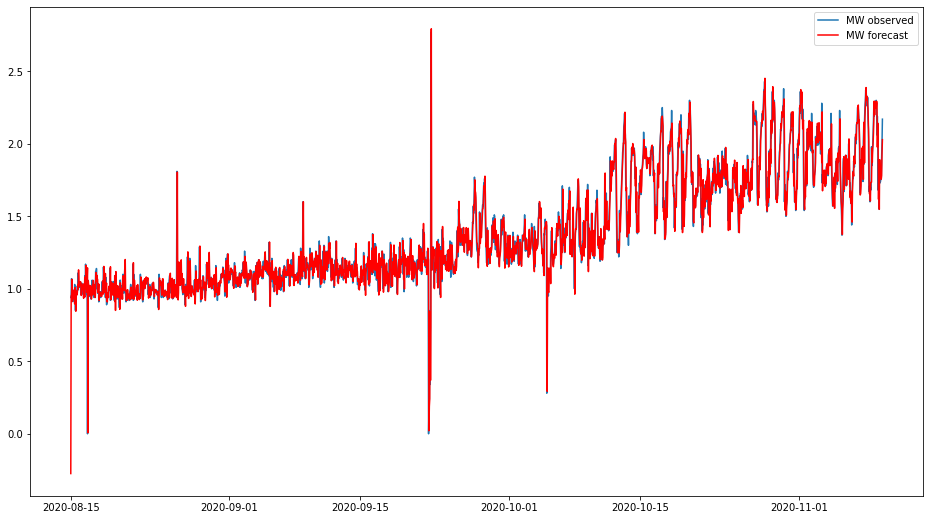

In [100]:
# evaluate generalization performance of SARIMAX model above (In-sample forecast)
obs=ts1['MW']
pred=ts1['Forecast_SARIMAX']

# RMSE
rmse = sqrt(mean_squared_error(obs, pred))                                                # algo for RMSE
print('Test RMSE: %.3f' % rmse)

# MAPE - from 'https://vedexcel.com/how-to-calculate-mape-in-python/'
def mape(obs, pred):
    return np.mean(np.abs((obs - pred) / (obs)))*100                                      # algo for MAPE
result = mape(obs, pred)                                                  
print('Test MAPE: %.3f' % result)                            

#SMAPE - from  'https://vedexcel.com/how-to-calculate-smape-in-python/'
def smape(obs, pred):
    return 100/len(obs) * np.sum(2 * np.abs(pred - obs) / (np.abs(obs) + np.abs(pred)))   # algo for SMAPE

result = smape(obs,pred)
print('Test SMAPE: %.3f' % result)

# Pearson Correlation
corr = np.corrcoef(obs, pred)[0,1]
print('Correlation: %.3f' % corr)

# R2 
r2_result = corr**2                                                                       # algo for R-squared
print('R-squared: %.3f' % r2_result)


# plot forecasts against actual outcomes

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
plt.plot(obs, label = 'MW observed')
plt.plot(pred, color='red', label = 'MW forecast')
plt.legend()
plt.show()

In [ ]:
# end